# Assignment 1: Inspecting the Dataset

In this first assignment, we will get to know the dataset that we will be using throughout. You can find the assignment tasks at the bottom of this document.

Our dataset consists of short texts (article abstracts) from the [PubMed](https://www.ncbi.nlm.nih.gov/pubmed/) database of scientific publications in the Life Science domain. As the full dataset consists of millions of documents, we are using just a small subset, namely all publications that contain the word "allergy" in their title or abstract. You can download that dataset in the form of four files (`allergy_Summaries.pkl.bz2`, etc.) from Canvas. Save these four files in a directory called `data` (do not unpack them, but save them as .bz2 files!), which should be a sub-directory of the one that contains this notebook file.

## Importing some Libraries

In [1]:
from collections import namedtuple, defaultdict, Counter
import pickle, bz2

## Loading the Dataset

In [2]:
Summaries_file = 'data/allergy_Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword (like `var.year`), rather than index (like `var[2]`).

In [3]:
paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [4]:
Summaries[22538601]

paper(title='Forum: Immunology: Allergy challenged.', authors=['Artis D', 'Maizels RM', 'Finkelman FD'], year=2012, doi='10.1038/484458a')

In [5]:
Summaries[22538601].title

'Forum: Immunology: Allergy challenged.'

## Dataset Statistics

The two lines below will install [matplotlib](http://matplotlib.org/) and [NumPy](http://www.numpy.org/), if they are not installed already (if that doesn't work, you might have to download and install them from [here](http://matplotlib.org/downloads.html) and [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/)). We will need these libraries for drawing diagrams and analyzing the data below.

In [6]:
! pip install --user matplotlib
! pip install --user numpy

In [7]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per Year

First, we will try to find out how many papers in the dataset were published per year. We are using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class for this.

In [8]:
paper_years = [ p.year for p in Summaries.values() ]
papers_per_year = sorted( Counter(paper_years).items() )
print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

Number of papers in the dataset per year for the past decade:
[(2011, 2276), (2012, 2244), (2013, 2458), (2014, 2769), (2015, 2796), (2016, 2965), (2017, 3068), (2018, 3114), (2019, 3005), (2020, 4)]


Filtering results, to obain only papers since 1940:

In [9]:
papers_per_year_since_1940 = [ (y,count) for (y,count) in papers_per_year if y >= 1940 ]
print(papers_per_year_since_1940)
years_since_1940 = [ y for (y,count) in papers_per_year_since_1940 ]
nr_papers_since_1940 = [ count for (y,count) in papers_per_year_since_1940 ]

print('Number of papers in the dataset published since 1940:')
print(sum(nr_papers_since_1940))

[(1940, 11), (1941, 2), (1942, 3), (1943, 3), (1944, 5), (1945, 118), (1946, 351), (1947, 339), (1948, 425), (1949, 391), (1950, 702), (1951, 713), (1952, 709), (1953, 781), (1954, 696), (1955, 770), (1956, 657), (1957, 718), (1958, 698), (1959, 713), (1960, 779), (1961, 836), (1962, 804), (1963, 478), (1964, 283), (1965, 259), (1966, 293), (1967, 269), (1968, 274), (1969, 271), (1970, 279), (1971, 315), (1972, 229), (1973, 203), (1974, 194), (1975, 365), (1976, 386), (1977, 399), (1978, 376), (1979, 455), (1980, 401), (1981, 400), (1982, 434), (1983, 495), (1984, 491), (1985, 519), (1986, 571), (1987, 594), (1988, 621), (1989, 671), (1990, 675), (1991, 671), (1992, 752), (1993, 789), (1994, 849), (1995, 898), (1996, 1081), (1997, 1129), (1998, 1153), (1999, 1292), (2000, 1257), (2001, 1351), (2002, 1452), (2003, 1547), (2004, 1531), (2005, 1674), (2006, 1705), (2007, 1714), (2008, 1865), (2009, 1854), (2010, 1959), (2011, 2276), (2012, 2244), (2013, 2458), (2014, 2769), (2015, 2796), 

Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

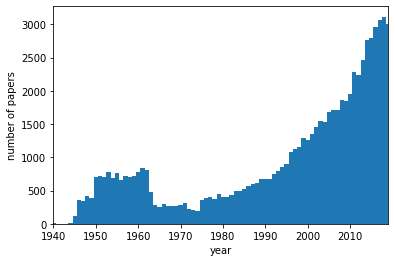

In [10]:
plt.bar(x=years_since_1940, height=nr_papers_since_1940, width=1.0)
plt.xlim(1940, 2019)
plt.xlabel('year')
plt.ylabel('number of papers');

Alternatively, we can get the same result by plotting it as a histogram with [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist):

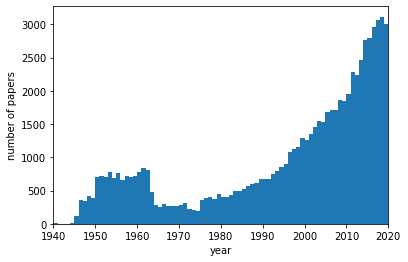

In [11]:
plt.hist( x=[p.year for p in Summaries.values()], bins=range(1940,2021) );
plt.xlim(1940, 2020)
plt.xlabel('year')
plt.ylabel('number of papers');

### Papers per Author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [12]:
# flattening the list of lists of authors:
flat_author_list = [ auth for paper in Summaries.values() for auth in paper.authors ]
print(flat_author_list[-10:])
nr_papers_by_author = Counter( flat_author_list )


['Culver GD', 'Faber HK', 'Murray V', 'Gurd FB', 'Duval CW', 'Gurd EB', 'Knox JH', 'Moss WL', 'Brown GL', 'Amberg S']


In [13]:
print('Number of authors in the dataset with distinct names:')
print(len(nr_papers_by_author))

Number of authors in the dataset with distinct names:
137755


In [14]:
print('Top 50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1], reverse=True)[:50])

Top 50 authors with greatest number of papers:
[('Valenta R', 335), ('Sampson HA', 313), ('Bousquet J', 270), ('Bruze M', 259), ('Canonica GW', 248), ('Johansen JD', 240), ('Passalacqua G', 232), ('Demoly P', 231), ('Menné T', 219), ('Ring J', 208), ('Wahn U', 193), ('Burks AW', 185), ('Sicherer SH', 181), ('Vieths S', 181), ('Moneret-Vautrin DA', 181), ('Niggemann B', 167), ('Wüthrich B', 162), ('Sheikh A', 161), ('van Ree R', 158), ('Andersen KE', 158), ('Beyer K', 157), ('Asero R', 157), ('Akdis CA', 155), ('Allen KJ', 154), ('Bindslev-Jensen C', 154), ('Muraro A', 152), ('Ciprandi G', 152), ('Incorvaia C', 151), ('Fiocchi A', 149), ('Roberts G', 146), ('Kraft D', 146), ('Ebisawa M', 145), ('Wood RA', 144), ('Uter W', 140), ('Wang J', 137), ('Ebner C', 137), ('Haahtela T', 132), ('Thyssen JP', 132), ('Björkstén B', 129), ('Papadopoulos NG', 128), ('Zuberbier T', 128), ('Lack G', 128), ('Zhang Y', 127), ('Knulst AC', 126), ('Wickman M', 124), ('Warner JO', 122), ('Kimber I', 120), ('

Then we can create a histogram to visualize the results:

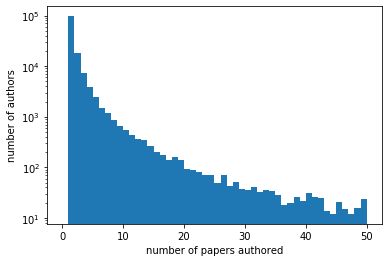

In [15]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(51), log=True )
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per Paper

Then we can make a similar analysis for the number of authors per paper:

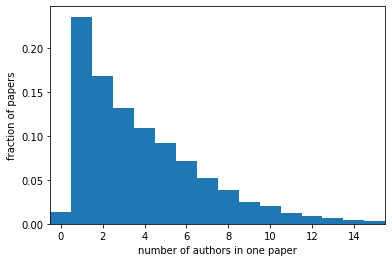

In [16]:
plt.hist(x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), align='left', density=True)
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(-0.5, 15.5);

### Words in Titles

And then we can have a first look into the words we find in titles (applying a very naive word splitting method for now):

In [17]:
words = [ word.lower() for paper in Summaries.values() for word in paper.title.split(' ') ]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
63474


----------

# Tasks

**Your name:** Polina Boneva (pba590)

### Task 1

Create a Python dictionary object that returns sets of author names for a given year. Name this dictionary `authors_at_year`. (You can use a [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict) with a default value of [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).) Demonstrate the working of this dictionary by showing the author set for the year 1935.

In [18]:
authors_at_year = defaultdict(set)
authors_per_year = [(paper.year, paper.authors) for paper in Summaries.values()]
for (year, authors) in authors_per_year:
    for author in authors:
        authors_at_year[year].add(author)
        
print('Papers authors for the year 1935:')
print(authors_at_year[1935])

Papers authors for the year 1935:
{'Cooke RA', 'Martin EG', 'Barnard JH', 'Hebald S', 'Stull A', 'Jay HM'}


### Task 2

Based on the dictionary `authors_at_year` from exercise 1 above, create a plot for the years from 1940 until now that shows how many authors published at least one paper in the given particular year. (You can retrieve the number of unique items in a set `s` with `len(s)`.)

Text(0, 0.5, 'number of authors')

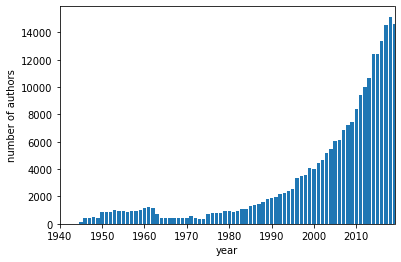

In [27]:
sorted_authors_at_year = sorted(authors_at_year.items())
authors_at_year_since_1940 = [ (y,len(authors_at_year[y])) for (y, authList) in sorted_authors_at_year if y >= 1940 ]

plt.bar(x=years_since_1940, height=[ count for (y, count) in authors_at_year_since_1940])
plt.xlim(1940, 2019)
plt.xlabel('year')
plt.ylabel('number of authors')

### Task 3

Print out the top 10 most often occurring words in the papers' titles together with their frequency (in descending order with respect to the frequency). Use the data structures created above (in the sections before the tasks).

In [20]:
print(word_counts.most_common(10))

[('of', 52379), ('in', 38590), ('and', 35612), ('the', 26613), ('allergy', 16954), ('to', 15350), ('a', 15314), ('with', 12125), ('allergic', 8569), ('for', 8192)]


### Task 4

Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 100 most frequent words in titles of papers, from most frequent to least frequent. (For readability, don't show the actual words.) Make again use of the data structures created above.

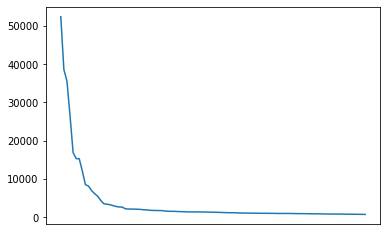

In [21]:
hundred_most_common_words = word_counts.most_common(100)
plt.plot([ word for (word,count) in hundred_most_common_words ], [ count for (word,count) in hundred_most_common_words ])

plt.gca().axes.get_xaxis().set_visible(False)

### Task 5

What do you notice when looking at the top 10 most frequent words? Explain all types of words we find in this top-10 and why.

**Answer:** The top 10 most frequent words are all prepositions or contain the root 'allergy'. This is not a surprise since almost every sentence in the papers needs prepositions and connecting words inbetween the nouns, verbs, and adjectives in it. As there are only a limited number of useful prepositions, it is natural that some of them are used numerous times. Moreover, since the papers are all on the topic of allergies, two of the top ten most common words are allergy and allergic. 

# Submission

Submit the answers to the assignment via Canvas as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers.

Before submitting, restart the kernel and re-run the complete code (**Kernel > Restart & Run All**), and then check whether your assignment code still works as expected.

Don't forget to add your name, and remember that the assignments have to be done individually and group submissions are **not allowed**.